In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\arack\Downloads\Salary Data.csv")

In [3]:
data.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
data.shape

(375, 6)

In [7]:
data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [8]:
data.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

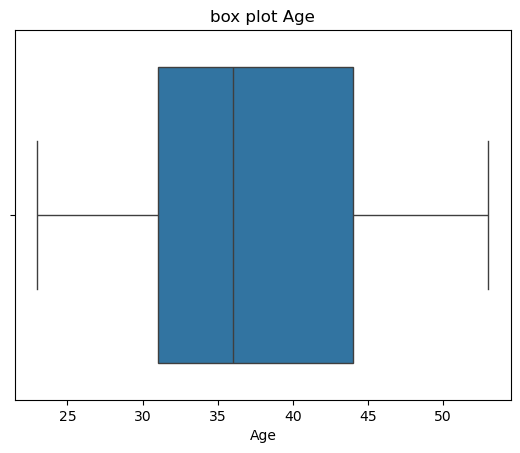

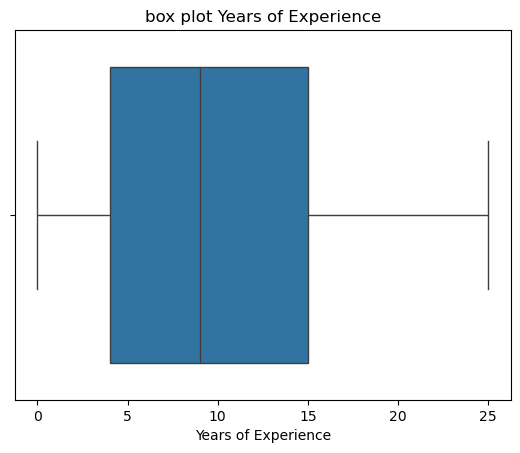

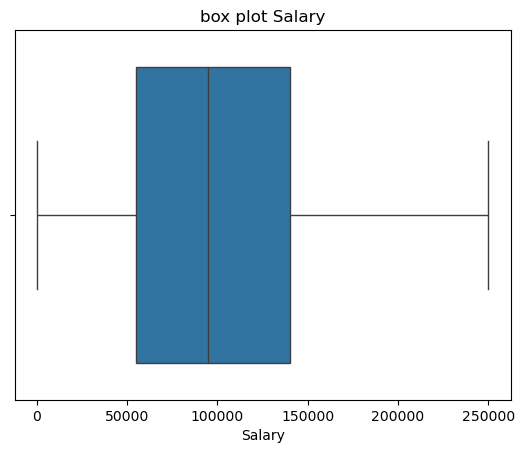

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
for column in data.select_dtypes(include='float'): 
    sns.boxplot(x=data[column])
    plt.title(f"box plot {column}")
    plt.show()


In [10]:
data.duplicated().sum()

50

In [11]:
data.isnull()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [12]:
data[data.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [13]:
data.duplicated().sum()


50

In [14]:
data.dropna(inplace=True)

In [15]:
if data is None:
    print("Data is None!")
else:
    print(data.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [16]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


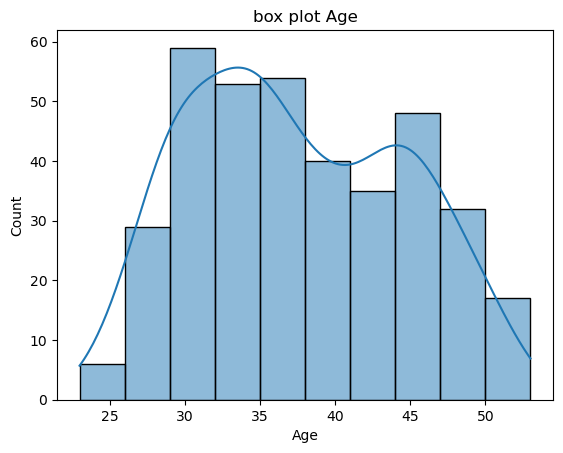

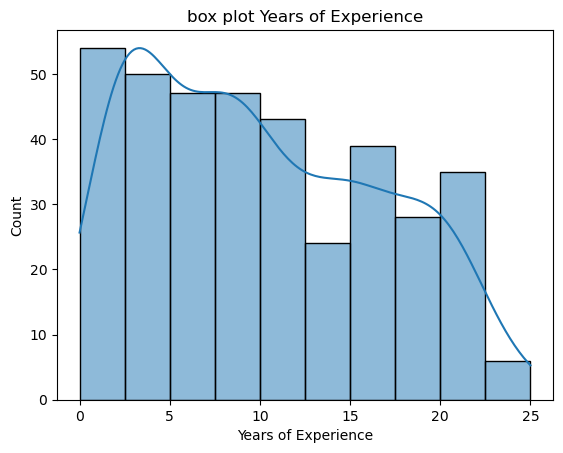

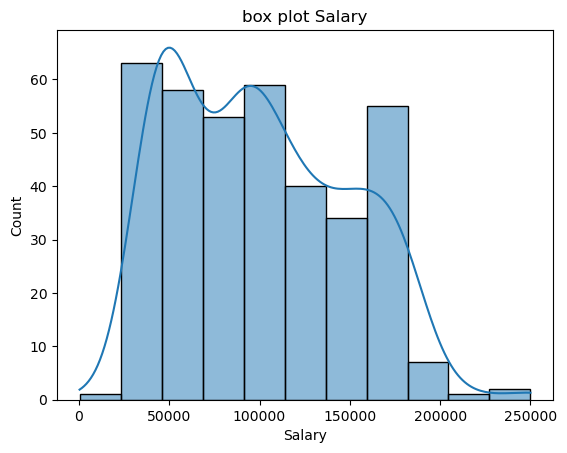

In [17]:
for column in data.select_dtypes(include='float'): 
    sns.histplot(x=data[column],kde=True)
    plt.title(f"box plot {column}")
    plt.show()

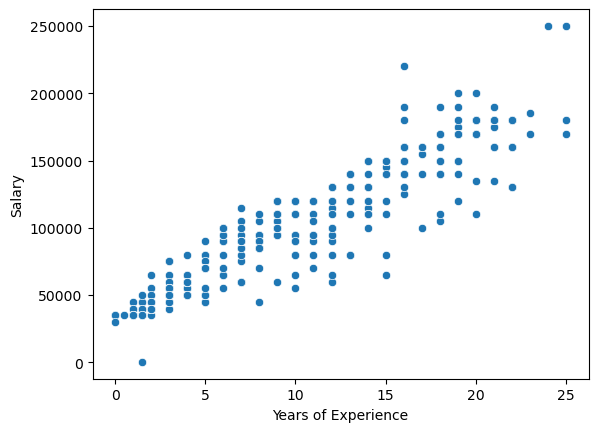

In [18]:
sns.scatterplot(data=data, x='Years of Experience', y='Salary')
plt.show()

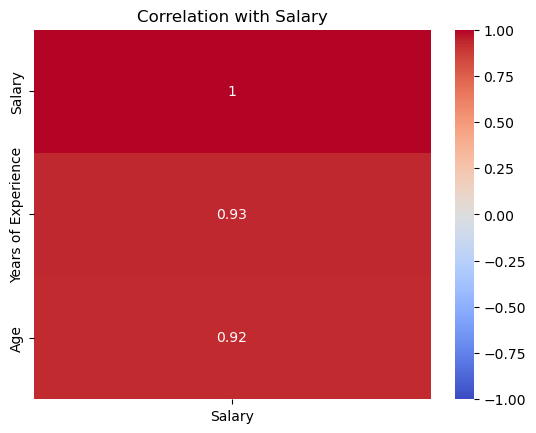

In [19]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
sns.heatmap(
    correlation[['Salary']].sort_values(by='Salary', ascending=False),
    vmin=-1, vmax=1,
    annot=True, cmap='coolwarm'
)
plt.title("Correlation with Salary")
plt.show()

In [20]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [21]:
x = data[['Age', 'Years of Experience']].values
x

array([[32. ,  5. ],
       [28. ,  3. ],
       [45. , 15. ],
       [36. ,  7. ],
       [52. , 20. ],
       [29. ,  2. ],
       [42. , 12. ],
       [31. ,  4. ],
       [26. ,  1. ],
       [38. , 10. ],
       [29. ,  3. ],
       [48. , 18. ],
       [35. ,  6. ],
       [40. , 14. ],
       [27. ,  2. ],
       [44. , 16. ],
       [33. ,  7. ],
       [39. , 12. ],
       [25. ,  0. ],
       [51. , 22. ],
       [34. ,  5. ],
       [47. , 19. ],
       [30. ,  2. ],
       [36. ,  9. ],
       [41. , 13. ],
       [28. ,  3. ],
       [37. , 11. ],
       [24. ,  1. ],
       [43. , 15. ],
       [33. ,  6. ],
       [50. , 25. ],
       [31. ,  4. ],
       [29. ,  3. ],
       [39. , 10. ],
       [46. , 20. ],
       [27. ,  2. ],
       [35. ,  7. ],
       [42. , 14. ],
       [26. ,  1. ],
       [49. , 21. ],
       [34. ,  5. ],
       [48. , 18. ],
       [30. ,  3. ],
       [36. ,  8. ],
       [41. , 13. ],
       [28. ,  2. ],
       [32. ,  5. ],
       [45. ,

In [22]:
y=data[["Salary"]].values
y

array([[ 90000.],
       [ 65000.],
       [150000.],
       [ 60000.],
       [200000.],
       [ 55000.],
       [120000.],
       [ 80000.],
       [ 45000.],
       [110000.],
       [ 75000.],
       [140000.],
       [ 65000.],
       [130000.],
       [ 40000.],
       [125000.],
       [ 90000.],
       [115000.],
       [ 35000.],
       [180000.],
       [ 80000.],
       [190000.],
       [ 50000.],
       [ 60000.],
       [140000.],
       [ 45000.],
       [110000.],
       [ 40000.],
       [140000.],
       [ 90000.],
       [250000.],
       [ 55000.],
       [ 75000.],
       [ 65000.],
       [170000.],
       [ 45000.],
       [ 60000.],
       [115000.],
       [ 40000.],
       [160000.],
       [ 80000.],
       [190000.],
       [ 60000.],
       [ 45000.],
       [130000.],
       [ 40000.],
       [ 75000.],
       [180000.],
       [120000.],
       [ 35000.],
       [130000.],
       [ 85000.],
       [ 60000.],
       [200000.],
       [ 50000.],
       [ 9

In [23]:
sc = StandardScaler()

StandardScaler is used to standardize your features by removing the mean and scaling to unit variance.

It transforms your data so that:

The mean becomes 0

In [25]:
x = sc.fit_transform(x)

fit(X):
Calculates the mean and standard deviation for each feature (e.g., age and experience).

transform(X):
Uses those values to standardize the data:

In [27]:
#train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True, stratify=None)

Splits x and y into 80% training and 20% testing

Shuffles the data before splitting (shuffle=True)

Random state is fixed so the split is reproducible

No stratification used (stratify=None) — fine for regression or balanced datasets

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
r2_score(y_test, y_pred)

0.8885130944068205

In [33]:
model.score(x_test, y_test)

0.8885130944068205

In [34]:
model.score(x_train, y_train)

0.862448986342897

In [35]:
mean_absolute_error(y_test, y_pred)

12358.463998978063

In [55]:
mean_squared_error(y_test, y_pred)

267299022.8607745

In [57]:
np.sqrt(mean_squared_error(y_test,y_pred))

16349.282028908012

In [41]:
# Recreate OUTPUT (if needed)
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'])

# Safely extract scalar from nested array, list, or any object
def extract_scalar(val):
    if isinstance(val, (list, np.ndarray)) and len(val) > 0:
        return val[0]
    return val

# Apply to both columns
OUTPUT['ACTUAL'] = OUTPUT['ACTUAL'].apply(extract_scalar)
OUTPUT['PREDICTION'] = OUTPUT['PREDICTION'].apply(extract_scalar)

# Convert to numeric (in case types are still mixed)
OUTPUT['ACTUAL'] = pd.to_numeric(OUTPUT['ACTUAL'], errors='coerce')
OUTPUT['PREDICTION'] = pd.to_numeric(OUTPUT['PREDICTION'], errors='coerce')

# Drop rows with NaNs (if any)
OUTPUT.dropna(inplace=True)

# Final check
print(OUTPUT.head())


     ACTUAL     PREDICTION
0  180000.0  171912.181586
1   65000.0  103906.321901
2  125000.0  141242.014838
3   80000.0   74586.752953
4  140000.0  142592.612638


In [63]:

mae = mean_absolute_error(OUTPUT['ACTUAL'], OUTPUT['PREDICTION'])
mse = mean_squared_error(OUTPUT['ACTUAL'], OUTPUT['PREDICTION'])
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 12358.46
MSE: 267299022.86
RMSE: 16349.28


MAE (Mean Absolute Error): 12,358.46 — On average, your predictions are off by about 12.3k units from the actual values.

MSE (Mean Squared Error): 267,299,022.86 — This penalizes larger errors more heavily.

RMSE (Root Mean Squared Error): 16,349.28 — Interpreted as standard deviation of residuals, so typical error magnitude is around 16.3k units.

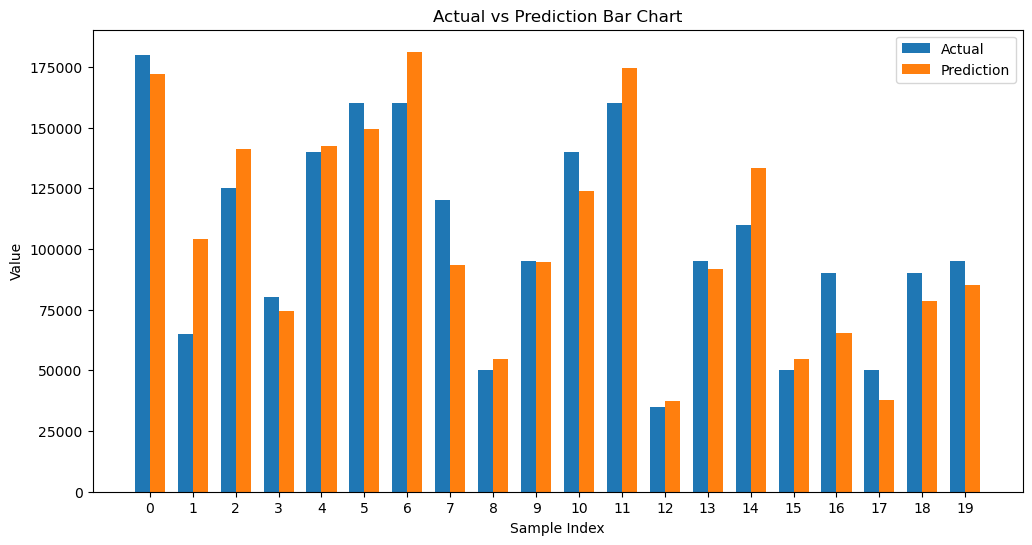

In [49]:
df_plot = OUTPUT.head(n_samples)

indices = np.arange(len(df_plot))
n_samples=20
plt.figure(figsize=(12,6))
bar_width = 0.35

# Bars for ACTUAL values
plt.bar(indices, df_plot['ACTUAL'], width=bar_width, label='Actual')

# Bars for PREDICTION values, shifted by bar_width
plt.bar(indices + bar_width, df_plot['PREDICTION'], width=bar_width, label='Prediction')

plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Prediction Bar Chart')
plt.xticks(indices + bar_width / 2, indices)  # set x-ticks to be between the grouped bars
plt.legend()
plt.show()

In [ ]:
0  180000.0  171912.181586
1   65000.0  103906.321901
2  125000.0  141242.014838
3   80000.0   74586.752953
4  140000.0  142592.612638